# Present the same data multiple ways

## Drill
Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:

1. Choose one variable and plot that variable four different ways.
2. Choose two continuous variables, and plot them three different ways.
3. Choose one continuous variable and one categorical variable, and plot them six different ways.
4. Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.

## Challenge
As an optional challenge, find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:

Probability distributions
Bivariate relationships
Whether the distributions or the relationships vary across groups

## Drug deaths: A story of growing opiod abuse

https://www.kaggle.com/shep312/drug-deaths-a-story-of-growing-opiod-abuse

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import folium
from folium.features import DivIcon

In [2]:
df = pd.read_csv("Accidental_Drug_Related_Deaths__2012-2017 (1).csv")
df.head()

,CaseNumber,Date,Sex,Race,Age,Residence City,Residence State,Residence County,Death City,Death State,...,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (not heroin),Other,Any Opioid,MannerofDeath,AmendedMannerofDeath,DeathLoc
0,13-16336,11/09/2013,Female,White,53.0,GROTON,NaN,NEW LONDON,GROTON,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"GROTON, CT\n(41.343693, -72.07877)"
1,12-18447,12/29/2012,Male,White,30.0,WOLCOTT,NaN,NEW HAVEN,WATERBURY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"WATERBURY, CT\n(41.554261, -73.043069)"
2,14-2758,02/18/2014,Male,White,43.0,ENFIELD,NaN,NaN,ENFIELD,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"ENFIELD, CT\n(41.976501, -72.591985)"
3,14-13497,09/07/2014,Female,White,24.0,WALLINGFORD,NaN,NaN,WALLINGFORD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"WALLINGFORD, CT\n(41.454408, -72.818414)"
4,13-14421,10/04/2013,Female,White,26.0,WEST HAVEN,NaN,NEW HAVEN,WEST HAVEN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"WEST HAVEN, CT\n(41.272336, -72.949817)"


## 1. Choose one continuous variable and plot it in four different ways.

Chosen variable: Age.<br>

#### 1. Age - histogram with proportion function
   In this histogram the variable age is categorize into bins.  The the number of observations that fall in each bin are plotted. <br>
   Pros: Good overview of whole dataset. Including the sample size. <br>
   Cons: No statistical summary. Overwhelming potentially.
#### 2. Age- Histogram with density function 
   The kernel density estimate function, estimates the density of the data along the variable.<br>
   Pros: Good overview of whole dataset. Local minima and maxima can be easily seen.<br>
   Cons: No statistical summary. Overwhelming potentially.
#### 3. Age - boxplot
   shows statistical summary data of the age variable, including median, percentiles and outlayers.<br>
   Pros: Still shows the distribution of the data and includes sumary stats (like median and percentiles) <br>
   Cons: Local minima and maxima can't be seen.
#### 4. Age - pointplot
   shows another type of statistical summary: Mean and standard deviation of the age variable.<br>
   Pros: Includes sumary stats (like mean and standard deviation) <br>
   Cons: Local minima and maxima can't be seen. No indication of the distribution of the data.

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


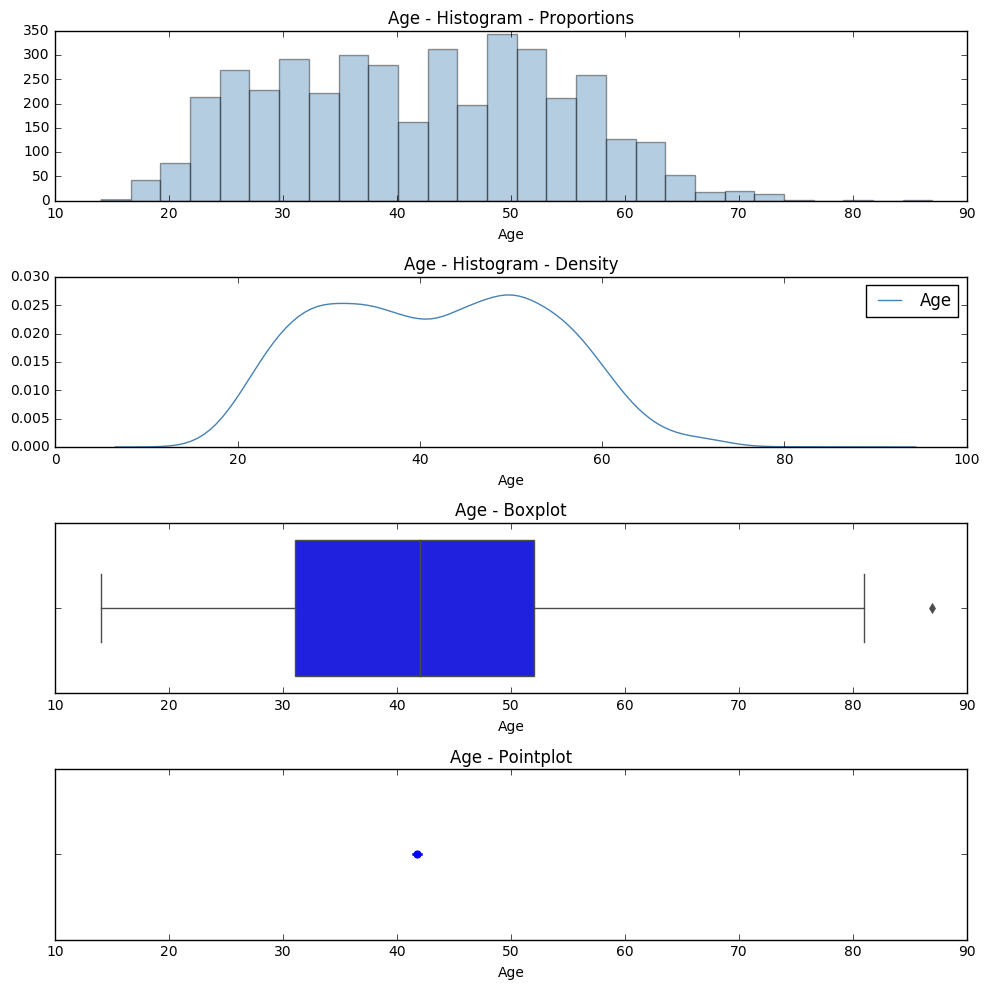

In [3]:
# Remove nas
#print(len(df.Age))
Age = df[['Age']]
Age = Age.dropna()
#print(len(Age))
# Convert float to integer
Age.Age.astype(int)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4, figsize=(10,10))
sns.distplot(Age['Age'],color="steelblue", kde=False, label='Age', ax=ax1)
ax1.set_title('Age - Histogram - Proportions')
plt.xlim(0, 100)

sns.distplot(Age['Age'],color="steelblue", hist=False, label='Age',ax=ax2)
ax2.set_title('Age - Histogram - Density')
plt.xlim(0, 100)

sns.boxplot(x='Age', data=Age, ax=ax3)
ax3.set_title('Age - Boxplot')
plt.xlim(0, 100)

sns.pointplot(x='Age', data=Age, ax=ax4)
ax4.set_title('Age - Pointplot')
plt.xlim(10, 90)

#plt.subplots_adjust(top=0.9)
fig.tight_layout()

## 2. Choose two continuous variables, and plot them three different ways.

Chosen variables: Age and Date.<br>

#### 1. Age over Date scatter plot
   Pros: The distribution of teh data can be seen.<br>
   Cons: No statistical summary. Overwhelming potentially. 
   
#### 2. Age over Date line plot
   In this plot, I counted the number of drug related death per month and ploted against the time. <br>
   Pros: Good overview of whole dataset, longterm trends are clearly visible. <br>
   Cons: No statistical summary. 

#### 3. Number of death per Month bar plot avearged over 5 years
   In this plot, I counted the number of drug related death per month and caculated the mean number of death per month over 5 years (2012-2017) <br>
   Pros: Easily understandable graphic, with mean and standard deviation. <br>
   Cons: No assumption can made on the whole dataset.

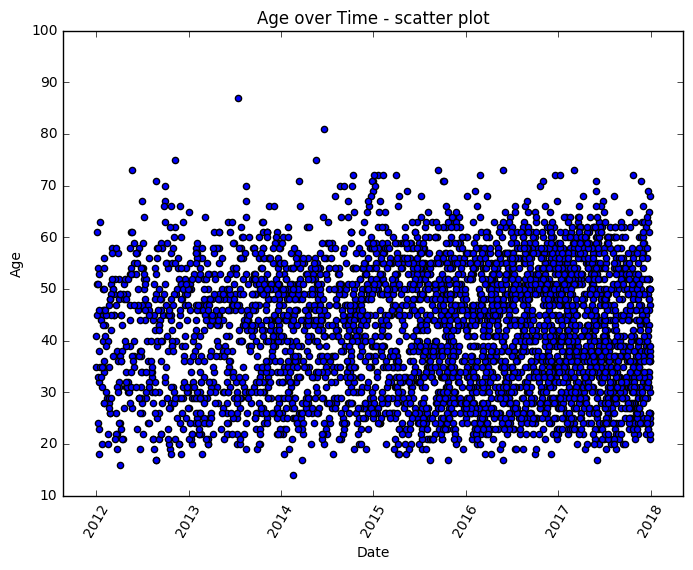

In [4]:
#Clean data
dfnew=df[['Date','Age']]
dfnew=dfnew.dropna()
#print(len(dfnew))
dfnew.Age.astype(int)
dfnew['Date'] = pd.to_datetime(dfnew['Date'])
dfnew = dfnew.set_index(dfnew['Date'])

#Make the plot
x_size = 8
y_size = 6
fig = plt.figure(figsize=(x_size,y_size))
ax = fig.add_subplot(111)
ax.scatter(list(dfnew.Date.values), list(dfnew.Age.values), marker='o')
#plt.scatter(x=dfnew['Date'],y=dfnew['Age'])
plt.title('Age over Time - scatter plot')
plt.xlabel('Date')
plt.ylabel('Age')
plt.xticks(rotation=60)
plt.show()

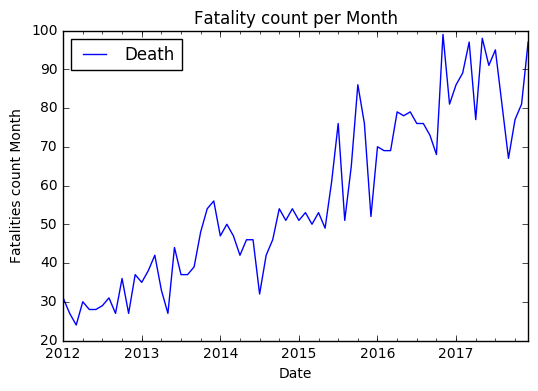

In [5]:
# Convert date from string to date times
df2=df[['Date','Age']]

df2=df2.dropna()
df2['Age'] = df2.Age.astype(int)
df2['Date'] = pd.to_datetime(df2['Date'])
df2=df2.set_index('Date')
#print(df2.head())

#print(df2.head())

#Group by month
df3= df2.groupby(pd.TimeGrouper(freq='M')).count()
df3 = df3.rename(columns={"Age": "Death"})
#print(df3.head())

df3.plot()
plt.ylabel('Fatalities count Month')
plt.title('Fatality count per Month')

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


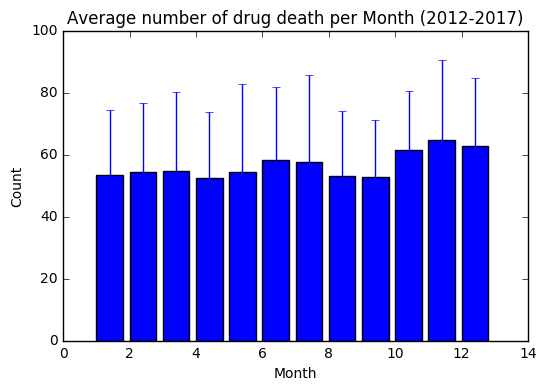

In [6]:
# Convert date from string to date times
df2=df[['Date','Age']]
df2['Date'] = pd.to_datetime(df2['Date'])
df2=df2.set_index('Date')
#print(df2.head())

#Number of fatalities per month over 5 years
df3= df2.groupby(pd.TimeGrouper(freq='M')).count()
df3 = df3.rename(columns={"Age": "Death"})
#print(df3.head())

#Average number of death per month over 5 years
f = {'Death':['mean', 'std']}
df5 = df3.groupby(df3.index.month).agg(f)
df5['Month']= df5.index

#print('df5:',df5)
#print(df5.columns[0])
#Get rid of the double indexed olumns
df5new = pd.DataFrame({'Month' : []})
df5new['Month']= df5['Month']
df5new['Mean']= df5[('Death','mean')]
df5new['Std']= df5[('Death','std')]

#print('df5new:',df5new)

#Make a barplot to display

plt.bar('Month', "Mean", yerr='Std', data=df5new)
plt.title('Average number of drug death per Month (2012-2017)')
plt.xlabel('Month')
plt.ylabel('Count')

## 3. Choose one continuous variable and one categorical variable, and plot them six different ways.

Chosen variables: Age and Gender. 


#### 1. Age-Gender- Histogram - 
When plotting this histogram in becomes obvious, that there are small differences between the age distriution for females and males. More drug related death were observed for women between 40 and 60 years, where as men had a maximum between 20-40.
In this plot it looks as if genders were eqully distributed in the data. <br>
Pros: Difference in the gender distribution can't be observed.<br>
Cons: The kernel density estimate function does not allow an assumption on the sample size for each group.


#### 2. Age-Gender- Histogram - Split by gender
However, when looking at a facetgrid histogram, it becomes clear that less female drug death are reported in this dataset.<br>
Pros:Good overview of the relationship of the two variables.Differences in sample size per group are obvious.<br>
Cons: If data is not in the same plot, direct comparisons are always difficult.

#### 3. Age-Gender - pointplot with error bars
Using the default setting the plot emphasizes the difference between the two groups, by adjusting the y-axis to an area between 40.5 to 43.5 years. It becomes clear, that the mean age of the gender groups are different.<br>
Pros:Mean and standarddeviation give and idea of central tendency and variance. <br>
Cons: Assumptions on the overall population can't be made.

#### 4. Age-Gender - Boxplot
Compared to the point plot, other statictical measures are visible. Here we can see that the data distribution for females is broader and that the median age for females is a little bit higher, compared to males.
Pros:Median,percentiles and outlayers can be seen, which allows assumptions on central tendency, variance and sample distribution <br>
Cons: 

#### 5. Age-Gender - Barplot
The barplot shows the same statistical parameters as the pointplot. We can see mean and standard deviation.
But it seem that a lot of plot space is wasted with the long bar. Where as the pointplot, but more emphasis on the difference between the two groups, in the barplot (without adjusting the y-axis), the groups look again very similar.
Pros:Mean and standarddeviation give and idea of central tendency and variance. <br>
Cons: Assumptions on the overall population can't be made. Figure space waste.

#### 6. Age Gender Violin plot
Is a combination of boxplot and histogram with kernel density estimation.
Pros: A lot of information: Median,percentiles and outlayers can be seen ( like in a boxplot), which allows assumptions on central tendency, variance and sample distribution, and further the shape is the kernel density function depicting the overall population. <br>
Cons: Might be overwhelming for audience.

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


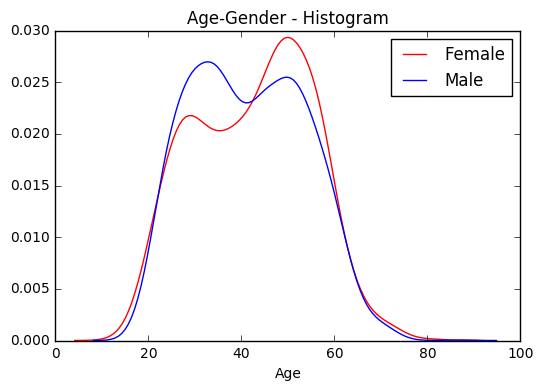

In [7]:
## Age-Gender- Histogram - overlay
# Remove nas
#print(len(df.Age))
AgeGender = df[['Age','Sex']]
AgeGender = AgeGender.dropna()
#print(len(Age))
# Convert float to integer
AgeGender.Age.astype(int)
FAge = AgeGender[AgeGender['Sex']=='Female']
MAge = AgeGender[AgeGender['Sex']=='Male']

sns.distplot(FAge['Age'],color="red",hist=False, label='Female')
sns.distplot(MAge['Age'], color="blue",hist=False, label='Male')
plt.title('Age-Gender - Histogram')
plt.legend()

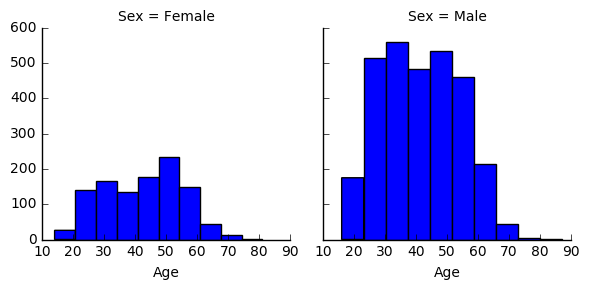

In [8]:
g=sns.FacetGrid(df, col="Sex", palette={"Female": "red", "Male": "blue"})
# Name the plot type and the variable to be plotted using the structure.
#How to add a title?
g.map(plt.hist, "Age") # what does this command do?

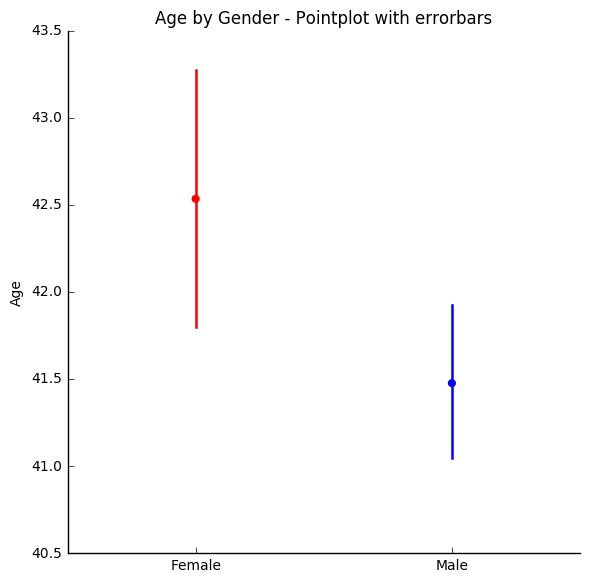

In [9]:
g = sns.factorplot(x="Sex", y="Age", data=df,
                   size=6, kind="point", palette={"Female": "red", "Male": "blue"},ci=95,dodge=True,join=False)
g.set_ylabels("Age")
g.set_xlabels("")
plt.title('Age by Gender - Pointplot with errorbars')
plt.show()

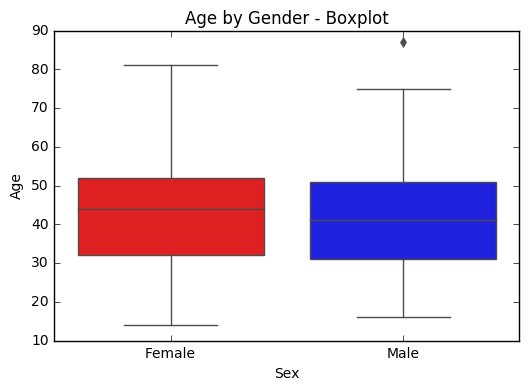

In [10]:
sns.boxplot(x='Sex', y='Age', data=df, palette={"Female": "red", "Male": "blue"})
plt.title('Age by Gender - Boxplot')

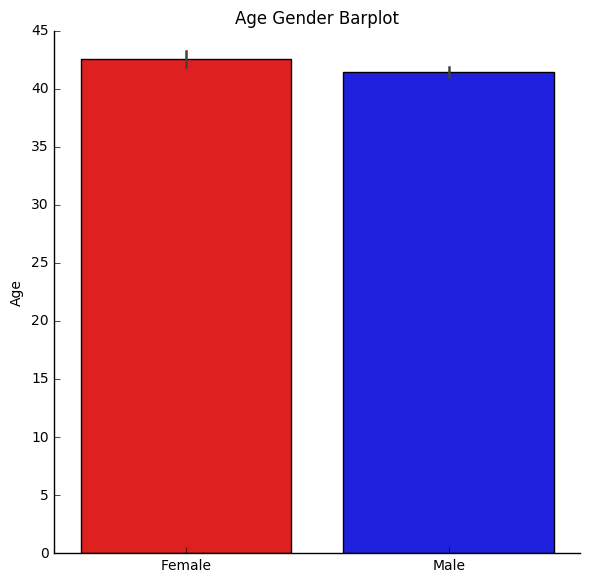

In [11]:
g = sns.factorplot(x="Sex", y="Age", data=df,
                   size=6, kind="bar", palette={"Female": "red", "Male": "blue"}, ci=95)
g.set_ylabels("Age")
g.set_xlabels("")
plt.title('Age Gender Barplot')
plt.show()

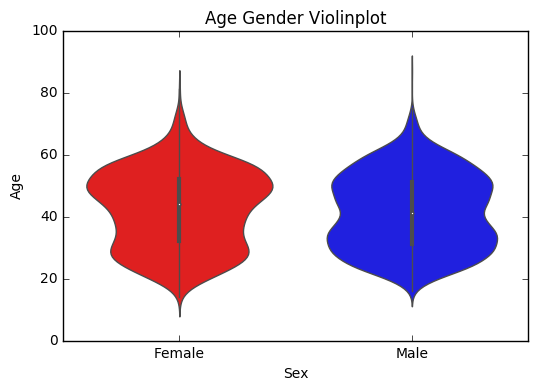

In [12]:
ax = sns.violinplot(y="Age",x="Sex", data=df, palette={"Female": "red", "Male": "blue"})
plt.title('Age Gender Violinplot')